In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pdf
import pandas as pd

In [2]:
fName = '/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/dataDPi.csv'

[-1.60268974 -0.81365466  4.14741898 ... -1.16746402  0.8462671
  1.96984696]
1207648
[-1.60268974 -0.81365466  4.14741898 ... -1.16746402  0.8462671
  1.96984696]


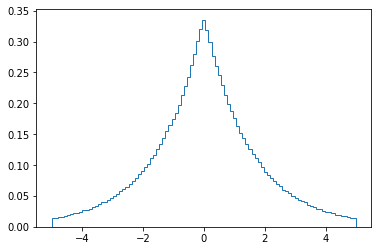

In [3]:
data = pd.read_csv(fName)
vData = data["mcdeltat"].to_numpy()

print(vData)
vDataRes = vData[~np.isnan(vData)]
print(vData.size)

plt.hist(vData, histtype='step', density = True, bins=np.linspace(-5, 5, 100))
print(vData)

In [54]:
#with kinematic smearing


beta = 276.11e-3
c = 299.792458 # um/ps
bgc = beta/(1 - beta**2)**0.5 * c

import chebFitter as chf
xLim = 10


'''pars = {'mus': -0.02626095363057232, 'sigmas': 0.3072386712992503, 
 'fTMains': 0.4330089152605952, 'fTR': 0.29621524420552536,
 'cLMs': 1.0678732529526804, 'cRMs': 0.9764846844663775, 
 'bigSigmaScale': 1.881006895250959, 'bigSigmaFrac': 0.3415193416782903,
 'fTBigs': 0.14416447268870816, 
 'cRBs': 0.205387662844106, 'cLBs': 0.26434489064239036}'''


#Values from mcFit
pars= {'mus': 0.030187083708440823, 'sigmas': 0.2262890366929741, 
 'fTMains': 0.6879121782503139, 'fTR': 0.5672982488332009,
 'cLMs': 3.3140215247817544, 'cRMs': 2.3873324559570195,
 'bigSigmaScale': 6.947680846616044, 'bigSigmaFrac': 0.0,
 'fTBigs': 0.6268934047143494, 'cLBs': 0.03283582286852792, 
 'cRBs': 0.564155326599834}

pars0 = pars.copy()
pars0["mus"] = 0
pars0["sigmas"] = 0.0001
pars0["fTMains"] = 0
pars0["bigSigmaFrac"] = 0


def fun(x, parsNow):
    return pdf.funDecay(x, pars0, tau=parsNow["tauB"], K=0.223+0*0.028)
    #return pdf.funDecayTheta(x, pars0, tau=parsNow["tauB"], theta=np.pi/2)
    

ch = chf.chebFitter(1024 + 1, -xLim, xLim, vData, fun)

#parsNow = {'tauB': 1.520}
parsNow = res
Limits = { 
    'tauB': (1.2, 1.9),
        }

res =  ch.fitData(parsNow, Limits)
print(res)

Loading data grid
Done
0.001457962564577508
{'tauB': 1.5304810421515331}


In [50]:
def plotHist(d, bins, chFit, res):
    vals, bins = np.histogram(d, bins)
    xCnt  = (bins[1:] + bins[:-1]) / 2
    xSize = (bins[1:] - bins[:-1]) / 2
    
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios':[16,3]}, figsize=(12,8))
    axs[0].set_yscale('log')
    axs[0].errorbar(xCnt, vals, xerr=xSize, yerr=np.sqrt(vals), ls='none', fmt="o")
    
    N = np.dot(vals, 2*xSize) 
    x = np.linspace(bins[0], bins[-1], 100)
    y = N * chFit.funFast(x, res)
    axs[0].plot(x, y, label='tau = '+str(parsNow['tauB']) + ' ps')
    axs[0].legend(loc='lower center', shadow=True, fontsize='x-large')
    # plotRatio
    yRat= N * chFit.funFast(xCnt, res) 
    axs[1].errorbar(xCnt, vals/ yRat, xerr=xSize, yerr=np.sqrt(vals)/yRat, ls='none', fmt="o")

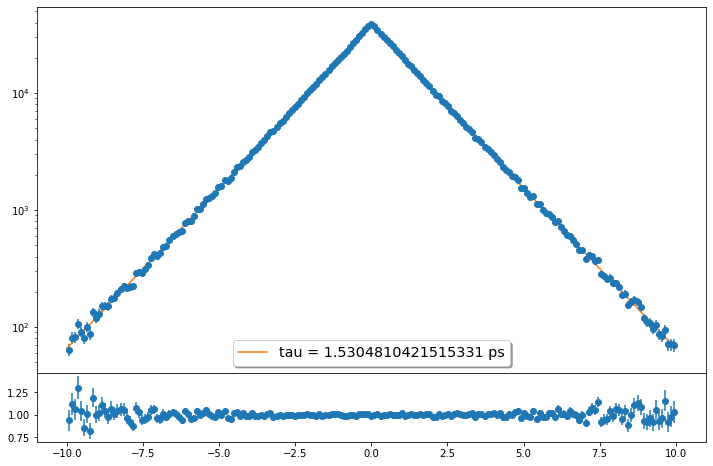

In [55]:
plotHist(vData, np.linspace(-xLim, xLim, 200), ch, res)

In [56]:
#without kinematic smearing

def fun(x, parsNow):
    return pdf.funDecayTheta(x, pars0, tau=parsNow["tauB"], theta = np.pi/2) 

In [61]:
'''pars = {'mus': -0.02626095363057232, 'sigmas': 0.3072386712992503, 
 'fTMains': 0.4330089152605952, 'fTR': 0.29621524420552536,
 'cLMs': 1.0678732529526804, 'cRMs': 0.9764846844663775, 
 'bigSigmaScale': 1.881006895250959, 'bigSigmaFrac': 0.3415193416782903,
 'fTBigs': 0.14416447268870816, 
 'cRBs': 0.205387662844106, 'cLBs': 0.26434489064239036}'''


#Values from mcFit
pars= {'mus': 0.030187083708440823, 'sigmas': 0.2262890366929741, 
 'fTMains': 0.6879121782503139, 'fTR': 0.5672982488332009,
 'cLMs': 3.3140215247817544, 'cRMs': 2.3873324559570195,
 'bigSigmaScale': 6.947680846616044, 'bigSigmaFrac': 0.0,
 'fTBigs': 0.6268934047143494, 'cLBs': 0.03283582286852792, 
 'cRBs': 0.564155326599834}

pars0 = pars.copy()
pars0["mus"] = 0
pars0["sigmas"] = 0.0001
pars0["fTMains"] = 0
pars0["bigSigmaFrac"] = 0


xLim = 10
ch = chf.chebFitter(1024 + 1, -xLim, xLim, vData, fun)

#parsNow = { 'tauB' : 1.520 }
parsNow = res
Limits = { 
    'tauB': (1.2, 1.9),
        }


res =  ch.fitData(parsNow, Limits)
print(res)

Loading data grid
Done
0.0014533235118139093
{'tauB': 1.5432838903966746}


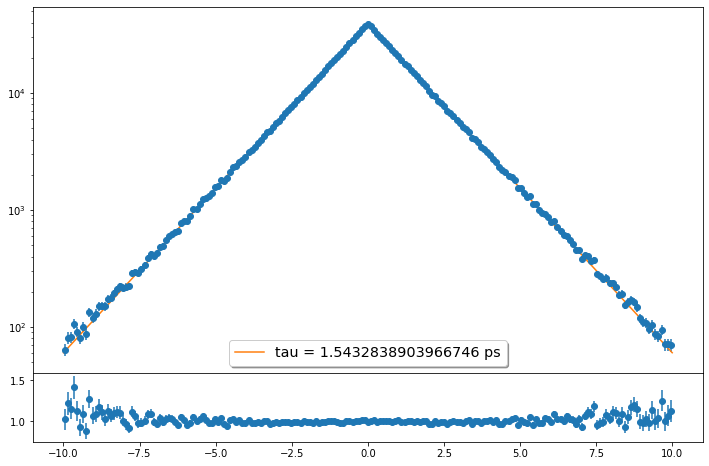

In [62]:
plotHist(vData, np.linspace(-xLim, xLim, 200), ch, res)